# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


Student surname: Domenichetti

Student name: Lorenzo

ID: 2011653

# Mind the n_jobs = 3 param. in GridSearch

In [1]:
#load the required packages and check Scikit-learn version
%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 987654321
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 56 62 61 51 57 68 67 65 58]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [55 56 62 61 51 57 68 67 65 58]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


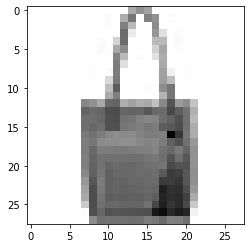

LABEL: 8
INPUT:


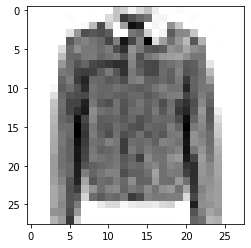

LABEL: 4
INPUT:


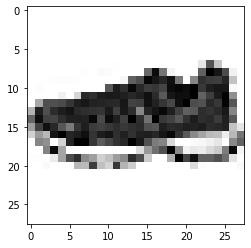

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,),(50,), (60,), (100,), (20,20,), (50,50), (100,100), (100,100,100) ]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

grd = GridSearchCV( estimator = mlp, param_grid=parameters, cv = 5, n_jobs = 3, return_train_score = True) 
grd.fit(X_train, y_train)

print(f"Check 5 fold validation: {grd.n_splits_ == 5}\n")

print ('RESULTS FOR NN\n')

res = pd.DataFrame(grd.cv_results_)
print (f'{display(HTML(res.to_html()))}\n')

print(f"Best parameters set found: {grd.best_params_}\n")

print(f"Score with best parameters: {grd.best_score_}\n")

print("All scores on the grid:\n")
print(f"{res[['param_hidden_layer_sizes', 'mean_test_score']]}")

Check 5 fold validation: True

RESULTS FOR NN



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.659916,0.509332,0.001480,0.000364,"(10,)","{'hidden_layer_sizes': (10,)}",0.408333,0.333333,0.608333,0.775000,0.791667,0.583333,0.186488,10,0.462500,0.406250,0.822917,1.000000,0.993750,0.737083,0.255819
1,1.970819,0.310414,0.002345,0.001002,"(20,)","{'hidden_layer_sizes': (20,)}",0.758333,0.758333,0.758333,0.775000,0.841667,0.778333,0.032318,5,1.000000,1.000000,1.000000,1.000000,0.997917,0.999583,0.000833
2,2.306370,0.136827,0.003853,0.001061,"(30,)","{'hidden_layer_sizes': (30,)}",0.766667,0.716667,0.800000,0.775000,0.858333,0.783333,0.046248,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,2.635495,0.282042,0.003110,0.001123,"(50,)","{'hidden_layer_sizes': (50,)}",0.775000,0.691667,0.783333,0.775000,0.825000,0.770000,0.043333,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,2.818016,0.342716,0.002590,0.001125,"(60,)","{'hidden_layer_sizes': (60,)}",0.808333,0.716667,0.775000,0.775000,0.841667,0.783333,0.041500,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,4.163805,0.429532,0.004543,0.001648,"(100,)","{'hidden_layer_sizes': (100,)}",0.816667,0.700000,0.791667,0.791667,0.883333,0.796667,0.058831,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.940050,0.170598,0.003073,0.001697,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.775000,0.475000,0.675000,0.716667,0.808333,0.690000,0.116952,9,0.939583,0.520833,0.808333,0.900000,0.883333,0.810417,0.150923
7,1.798896,0.526366,0.003027,0.001161,"(50, 50)","{'hidden_layer_sizes': (50, 50)}",0.766667,0.716667,0.750000,0.766667,0.816667,0.763333,0.032318,7,1.000000,1.000000,0.960417,0.979167,1.000000,0.987917,0.015943
8,2.806123,1.016745,0.003890,0.001262,"(100, 100)","{'hidden_layer_sizes': (100, 100)}",0.783333,0.783333,0.800000,0.791667,0.825000,0.796667,0.015456,1,1.000000,0.914583,0.981250,1.000000,0.952083,0.969583,0.032612
9,2.262271,0.536226,0.003855,0.001990,"(100, 100, 100)","{'hidden_layer_sizes': (100, 100, 100)}",0.708333,0.583333,0.700000,0.741667,0.841667,0.715000,0.082899,8,0.881250,0.631250,0.802083,0.900000,0.897917,0.822500,0.102116


None

Best parameters set found: {'hidden_layer_sizes': (100,)}

Score with best parameters: 0.7966666666666666

All scores on the grid:

  param_hidden_layer_sizes  mean_test_score
0                    (10,)         0.583333
1                    (20,)         0.778333
2                    (30,)         0.783333
3                    (50,)         0.770000
4                    (60,)         0.783333
5                   (100,)         0.796667
6                 (20, 20)         0.690000
7                 (50, 50)         0.763333
8               (100, 100)         0.796667
9          (100, 100, 100)         0.715000


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD

parameters = {'batch_size': [1, 32, 64, 128, 256, 480]}

#### --- best hiddel_layer_size = (100) --- ####

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp_batch = MLPClassifier(max_iter=250, hidden_layer_sizes=(100,), alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)

grd_batch = GridSearchCV(estimator = mlp_batch, param_grid=parameters, cv = kf, n_jobs = 3, return_train_score = True) 
grd_batch.fit(X_train, y_train)

print ('RESULTS FOR BATCH_TEST NN\n')

res_batch = pd.DataFrame(grd_batch.cv_results_)
print (f'{display(HTML(res_batch.to_html()))}\n')

print(f"Best parameters set found: {grd_batch.best_params_}\n")

print(f"Score with best parameters: {grd_batch.best_score_}\n")

print("All scores on the grid:\n")
print(f"{res_batch[['param_batch_size', 'mean_test_score']]}")

RESULTS FOR BATCH_TEST NN



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,146.348069,24.026274,0.002655,0.000799,1,{'batch_size': 1},0.091667,0.075000,0.075000,0.116667,0.091667,0.090000,0.015275,6,0.116667,0.087500,0.095833,0.106250,0.09375,0.100000,0.010291
1,4.974347,1.379116,0.003656,0.001101,32,{'batch_size': 32},0.758333,0.758333,0.741667,0.766667,0.825000,0.770000,0.028674,5,1.000000,0.945833,1.000000,0.983333,0.95000,0.975833,0.023629
2,4.810463,0.249620,0.006007,0.003339,64,{'batch_size': 64},0.800000,0.800000,0.733333,0.775000,0.808333,0.783333,0.027386,2,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
3,4.084707,0.153919,0.002557,0.000446,128,{'batch_size': 128},0.808333,0.783333,0.741667,0.775000,0.841667,0.790000,0.033500,1,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
4,4.312297,0.362280,0.003862,0.001433,256,{'batch_size': 256},0.766667,0.783333,0.741667,0.775000,0.841667,0.781667,0.033082,3,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
5,4.575489,0.495163,0.003530,0.001706,480,{'batch_size': 480},0.750000,0.783333,0.725000,0.766667,0.841667,0.773333,0.039229,4,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000


None

Best parameters set found: {'batch_size': 128}

Score with best parameters: 0.79

All scores on the grid:

  param_batch_size  mean_test_score
0                1         0.090000
1               32         0.770000
2               64         0.783333
3              128         0.790000
4              256         0.781667
5              480         0.773333


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]
If the architecture becomes too complicated, the test error decreses as the network starts overfitting. On the other hand, too simple networks do not manage to get the best results. It is then important to choose the right network in relation to the training sample used. Maybe, having more training data, more complex networks would perform better than simpler ones.
Batch size affects mainly the computation time and the stablity of the loss over training. In particular, we get quite constant results for different batches, apart from the classical GD which has probably an unstable behaviour. We will then prefer smaller batches (64-128) to bigger ones, because the latter either won't converge or will have slower loss convergence.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) with 7960 parameters 
Done! Training time: 3.83 sec

Training MLP of size (20,) with 15910 parameters 
Done! Training time: 2.87 sec

Training MLP of size (30,) with 23860 parameters 
Done! Training time: 3.27 sec

Training MLP of size (60,) with 47710 parameters 
Done! Training time: 3.74 sec

Training MLP of size (70,) with 55660 parameters 
Done! Training time: 4.27 sec

Training MLP of size (90,) with 71560 parameters 
Done! Training time: 4.80 sec

Training MLP of size (100,) with 79510 parameters 
Done! Training time: 5.05 sec

Training MLP of size (50, 50) with 42310 parameters 
Done! Training time: 2.56 sec

Training MLP of size (80, 80) with 70090 parameters 
Done! Training time: 2.55 sec

Training MLP of size (100, 100) with 89610 parameters 
Done! Training time: 4.67 sec

Training MLP of size (30, 20) with 24380 parameters 
Done! Training time: 2.31 sec

Training MLP of size (30, 30, 20) with 25310 parameters 
Done! Training time: 1.52 sec

Trainin

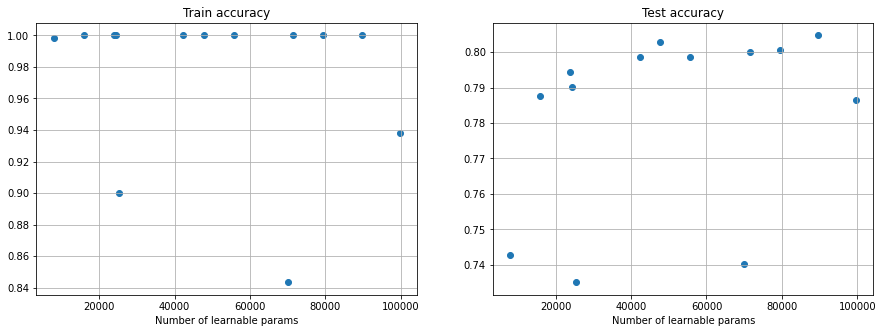

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (60,), (70,), (90,), (100,), (50,50), (80,80), (100,100),(30,20,), (30,30,20), (100,100,100)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
#train, test accuracies. Time and params used for creating a dataframe with some results.
train_acc_list, test_acc_list, times, params_n = [], [], [], []
for hl_size in hl_sizes:
    print(f"Training MLP of size {hl_size} with {param_count(hl_size)} parameters ")
    mlp = MLPClassifier(hidden_layer_sizes = hl_size, max_iter=300,
                        alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    times.append(time.time()-ti)
    params_n.append(param_count(hl_size))
    print('Done! Training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig1, ax = plt.subplots(1,2, figsize=(15,5))

df = pd.DataFrame()
df["params"] = params_n
df["train_acc"] = train_acc_list
df["test_acc"] = test_acc_list
df["Net Sizes"] = hl_sizes
df["times"] = times
df.sort_values(by = "params")

ax[0].scatter(df.params, df.train_acc)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].grid(True)

ax[1].scatter(df.params, df["test_acc"])
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].grid(True)


In [11]:
print(f"### ---Printing Results--- ### \n{display(HTML(df.to_html()))}")

,params,train_acc,test_acc,Net Sizes,times
0,7960,0.998333,0.74275,"(10,)",3.825714
1,15910,1.000000,0.78750,"(20,)",2.871385
2,23860,1.000000,0.79450,"(30,)",3.270474
3,47710,1.000000,0.80275,"(60,)",3.737715
4,55660,1.000000,0.79875,"(70,)",4.270495
5,71560,1.000000,0.80000,"(90,)",4.795549
6,79510,1.000000,0.80050,"(100,)",5.050663
7,42310,1.000000,0.79850,"(50, 50)",2.563725
8,70090,0.843333,0.74025,"(80, 80)",2.549270
9,89610,1.000000,0.80475,"(100, 100)",4.665665


### ---Printing Results--- ### 
None


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

In this case, we can see that increasing the complexity of the network, we do not get better and better results. This result can be linked also to the small size of the training set: from a certain point on, once reached the perfect classification on train samples, our network does not increase its accuracy. 
So, an increased number of neurons does not always lead to more precise results on the test set.
From the graphs just plotted there are no signs of neither over nor underfitting.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

Training MLP with lr: 0.001


/home/lorenzo/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Done! Training, appending and plotting time: 50.51 sec

Training MLP with lr: 0.01
Done! Training, appending and plotting time: 22.96 sec

Training MLP with lr: 0.1
Done! Training, appending and plotting time: 6.26 sec



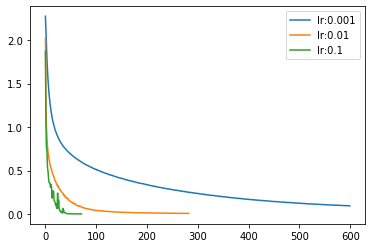

RESULTS FOR different Learning Rates:



,lr_param,train_scores,test_scores,times
0,0.001,0.996667,0.79400,50.453041
1,0.010,1.000000,0.79475,22.954479
2,0.100,1.000000,0.80375,6.257921


None
Best parameters set found:
   lr_param  train_scores  test_scores     times
2       0.1           1.0      0.80375  6.257921
Score with best parameters:
0.80375


In [12]:
import matplotlib.pyplot as plt
import operator

#### --- best hiddel_layer_size = (100,), batch_size = (64) --- ####

#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-3,0)]
scores = {}

ti = time.time()
lr_train, lr_test, lr_times= [], [], []
for lr in lr_list:
    print(f"Training MLP with lr: {lr}")
    mlp = MLPClassifier(hidden_layer_sizes = (100,), batch_size=64, max_iter=600, alpha=1e-4, solver='sgd',       
                        tol=1e-4, random_state=ID, learning_rate_init=lr)
    mlp.fit(X_train, y_train)
    
    lr_train.append(mlp.score(X_train, y_train))
    lr_test.append(mlp.score(X_test, y_test))
    lr_times.append(time.time()-ti)
    params_n.append(param_count(hl_size))
    plt.plot(mlp.loss_curve_, label = "lr:{}".format(lr))
    print('Done! Training, appending and plotting time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

plt.legend(loc = 'best')
plt.show()
print ('RESULTS FOR different Learning Rates:\n')

lr_df = pd.DataFrame({'lr_param': lr_list, 'train_scores': lr_train, 'test_scores': lr_test,
                      'times': lr_times})
print(f"{display(HTML(lr_df.to_html()))}")
print("Best parameters set found:")
print(lr_df.loc[lr_df['test_scores']==lr_df['test_scores'].max(),:])

print("Score with best parameters:")
print(lr_df["test_scores"].max())


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]
As shown, the learning curves have different trends. While the curve with the biggest learning rate converges rapidly, but also quite noisily, the one with the smallest learning rate does not manage to converge within the given number of iterations. The best solution is represented, in this case, by the middle line - its loss function shows a reasonably fast but smooth fall. Even if the final result is slightly better in the case of the biggest learning rate, I'd choose 0.01 as the best parameter - as said, the former leads to a noisy solution, that may not lead in other cases to the optimal solution.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.205250


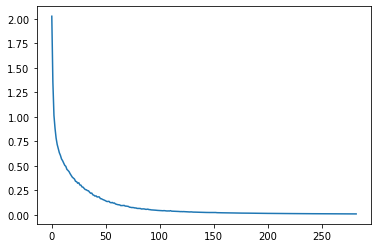

In [13]:
#get training and test error for the best NN model from CV
lr = 0.01
best_mlp = MLPClassifier(hidden_layer_sizes = (100,), batch_size=64, max_iter=600, alpha=1e-4,
                         solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=lr)
best_mlp.fit(X_train, y_train)

best_train = 1. - best_mlp.score(X_train, y_train)
best_test  = 1. - best_mlp.score(X_test , y_test ) 
print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % best_train)
print ("Best NN test error: %f" % best_test)

plt.plot(best_mlp.loss_curve_)
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [14]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [416 388 397 414 403 409 397 388 401 387]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).


RESULTS FOR BEST NN, 4000 training points

Best NN training error: 0.000000
Best NN test error: 0.167393


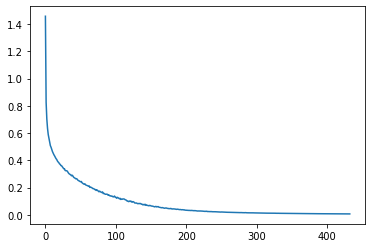

In [15]:
# same MLP parameters as before
largeTS_best_mlp = MLPClassifier(hidden_layer_sizes = (100,), batch_size=128, max_iter=600,
                         alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=0.01)
largeTS_best_mlp.fit(X_train, y_train)

best_train = 1. - largeTS_best_mlp.score(X_train, y_train)
best_test  = 1. - largeTS_best_mlp.score(X_test , y_test ) 
print ('\nRESULTS FOR BEST NN, 4000 training points\n')

print ("Best NN training error: %f" % best_train)
print ("Best NN test error: %f" % best_test)

plt.plot(largeTS_best_mlp.loss_curve_, label = 'loss curve')
plt.show()

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]
As long as the network manages to learn more from the training set in the case of a bigger training set we get a more robust predictor, and we have a smaller final test error. In both cases I get a 0 train error, but I would not have been surprised for a non-zero training error in the larger train set case (as happens in the SVM case).

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


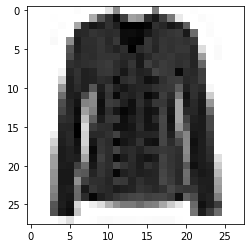

LABEL: 6
NN_label = 2
largeTS_NN_label = 6
Real_label = 6


In [16]:
NN_prediction = best_mlp.predict(X_test)
largeTS_NN_prediction = largeTS_best_mlp.predict(X_test)

index = 0
for i in range(len(y_test)):
    if (NN_prediction[i]!=largeTS_NN_prediction[i]):
        if (largeTS_NN_prediction[i]==y_test[i]):
            index = i
            break

plot_input(X_test, y_test, index)
print(f"NN_label = {NN_prediction[i]}" )
print(f"largeTS_NN_label = {largeTS_NN_prediction[i]}" )
print(f"Real_label = {y_test[i]}")

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


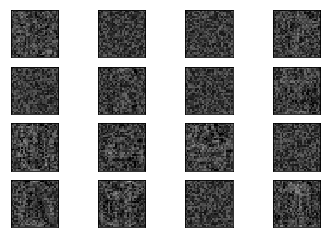

Weights with 4000 data points:


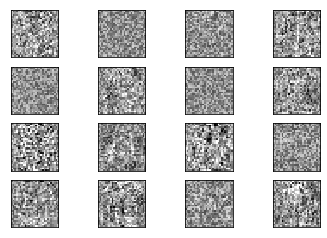

In [17]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = largeTS_best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(largeTS_best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

Some weights actually resemble input data and have a shape similar to actual clothes. Anyway, our NN uses both these kind of weights and the other ones where we can just see "random noise". But also the latter are actual weights, used for a classification that overall works fine. Neural networks are, in a certain sense, black boxes: it is quite hard to correct their behaviour just by looking at the used weights. We do need to "trust" their results.


### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [18]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

best_SVM = SVC(kernel = 'rbf', C = 50, gamma = 0.005 )

best_SVM.fit(X_train, y_train)

SVM_training_error = 1-best_SVM.score(X_train, y_train)
SVM_test_error = 1-best_SVM.score(X_test, y_test)

print ('RESULTS FOR SVM')

print("Training score SVM:")
print(SVM_training_error)

print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0036000000000000476
Test score SVM:
0.14789090909090907


In [19]:
from sklearn import linear_model

lrm = linear_model.LogisticRegression(C=1)

lrm.fit(X_train, y_train)

LR_training_error = 1-lrm.score(X_train, y_train)
LR_test_error = 1-lrm.score(X_test, y_test)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

print ("Training error (reg): %f" % LR_training_error)
print ("Test error (reg): %f" % LR_test_error)

/home/lorenzo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.079000
Test error (reg): 0.169509


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

## [ANSWER TO QUESTION 6]
The SVM achieves the best result. As seen, also historically NN managed to outperform "classical" approaches only after the introduction of deep networks and advanced techniques. 

Also Logistic Regression, even if is much simpler than NNs, does not perform too badly when compared to the NN themselfs. This result suggests us to use in general complex NN architechtures when needed, and to rely on more "traditional" algorithms patterns, which still today work just fine on many dataset.